# Dự đoán giá cổ phiếu sử dụng mô hình mạng LSTM

# 1. Import thư viện:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import r2_score
import os

# 2. Tạo thư mục để lưu mô hình đã huấn luyện:

In [3]:
# Tạo thư mục để lưu mô hình đã huấn luyện
model_dir = "D:"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

stockList = ["FPT", "MSN", "PNJ", "VIC"]

df_ = {}
for i in stockList:
    df_[i] = pd.read_csv("C:/Users/Nhat Tan/Downloads/Dataset/" + i + ".csv", index_col="Date/Time", parse_dates=True)

# 3. Chia bộ dữ liệu:
Bộ dữ liệu được chia thành 2 bộ Train set và test set với tỉ lệ 80:20.

In [4]:
def split(dataframe, ratio, col):
    split_idx = int(len(dataframe) * ratio)
    return dataframe.iloc[:split_idx][col], dataframe.iloc[split_idx:][col]

df_new = {}
for i in stockList:
    df_new[i] = {}
    df_new[i]["Train"], df_new[i]["Test"] = split(df_[i], 0.8, "Close")

# 4. Tiền xử lý dữ liệu:
Ta scale lại giá cổ phiểu trong khoảng từ 0 đến 1 sử dụng **MinMaxScaler**.

In [5]:
scaler = {}
data_scaled = {}

for i in stockList:
    sc = MinMaxScaler(feature_range=(0,1))
    data_scaled[i] = {}
    a0 = np.array(df_new[i]["Train"])
    a1 = np.array(df_new[i]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    data_scaled[i]["Train"] = sc.fit_transform(a0)
    data_scaled[i]["Test"] = sc.transform(a1)
    scaler[i] = sc

# 5. Chuẩn bị dữ liệu và xây dựng mô hình LSTM:
Dữ liệu được chuẩn hóa (scaled) cho từng mã cổ phiếu trong danh sách `stockList`. Tạo dữ liệu huấn luyện (`X_train`, `y_train`) và kiểm tra (`X_test`, `y_test`) dựa trên một khoảng thời gian trượt là `lookback` (60 ngày). Dữ liệu đầu vào được định hình lại thành các mảng 3 chiều phù hợp với yêu cầu của mô hình LSTM. 
Mô hình LSTM gồm 4 lớp LSTM với 50 đơn vị (units), kèm theo các lớp Dropout để giảm thiểu overfitting.  Sau cùng là một lớp Dense với 1 đơn vị để dự đoán giá trị đầu ra.Đánh giá mô hình dự đoán trên tập dữ liệu kiểm tra và đánh giá mô hình bằng chỉ số R².
á trị dự đoán.

--- 


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fitting to FPT
Epoch 1/3
259/259 ━━━━━━━━━━━━━━━━━━━━ 66s 230ms/step - loss: 0.0381
Epoch 2/3
259/259 ━━━━━━━━━━━━━━━━━━━━ 73s 281ms/step - loss: 0.0114
Epoch 3/3
259/259 ━━━━━━━━━━━━━━━━━━━━ 61s 236ms/step - loss: 0.0078


607/607 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step


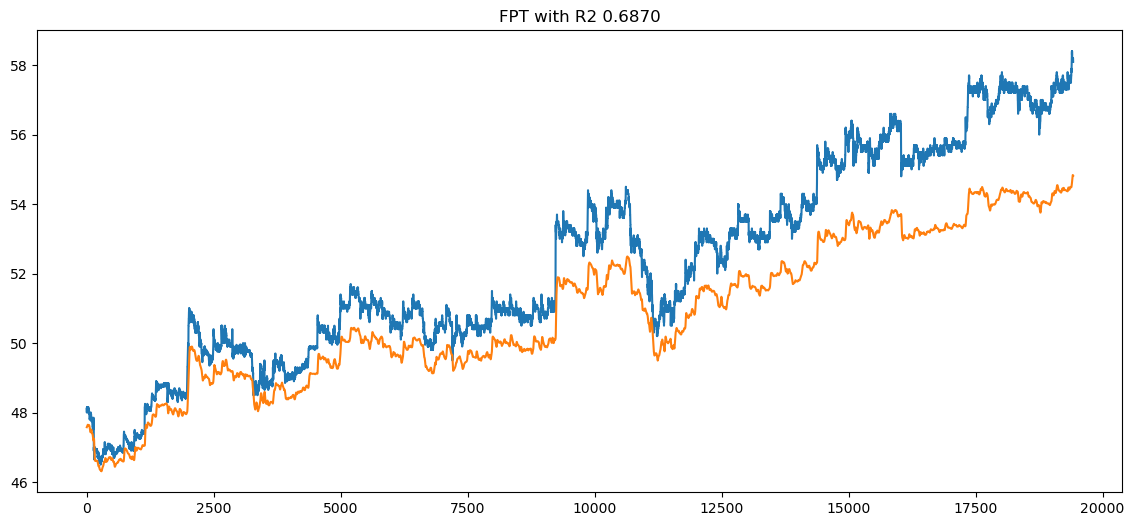

Fitting to MSN
Epoch 1/3


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


360/360 ━━━━━━━━━━━━━━━━━━━━ 102s 266ms/step - loss: 0.0191
Epoch 2/3
360/360 ━━━━━━━━━━━━━━━━━━━━ 95s 263ms/step - loss: 0.0047
Epoch 3/3
360/360 ━━━━━━━━━━━━━━━━━━━━ 93s 258ms/step - loss: 0.0029


845/845 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step


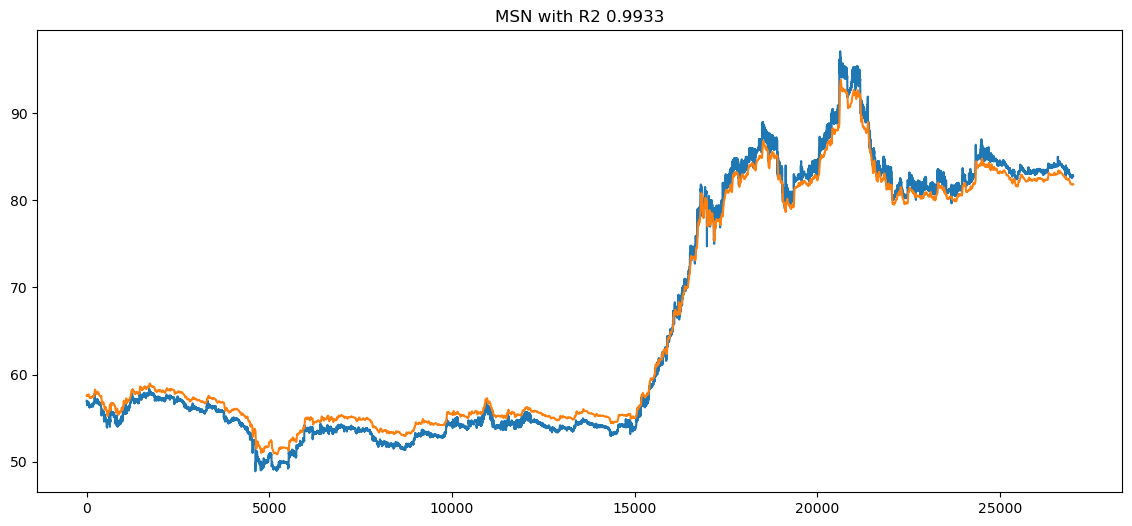

Fitting to PNJ
Epoch 1/3


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


333/333 ━━━━━━━━━━━━━━━━━━━━ 87s 242ms/step - loss: 0.0241
Epoch 2/3
333/333 ━━━━━━━━━━━━━━━━━━━━ 81s 244ms/step - loss: 0.0070
Epoch 3/3
333/333 ━━━━━━━━━━━━━━━━━━━━ 81s 245ms/step - loss: 0.0043


782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step


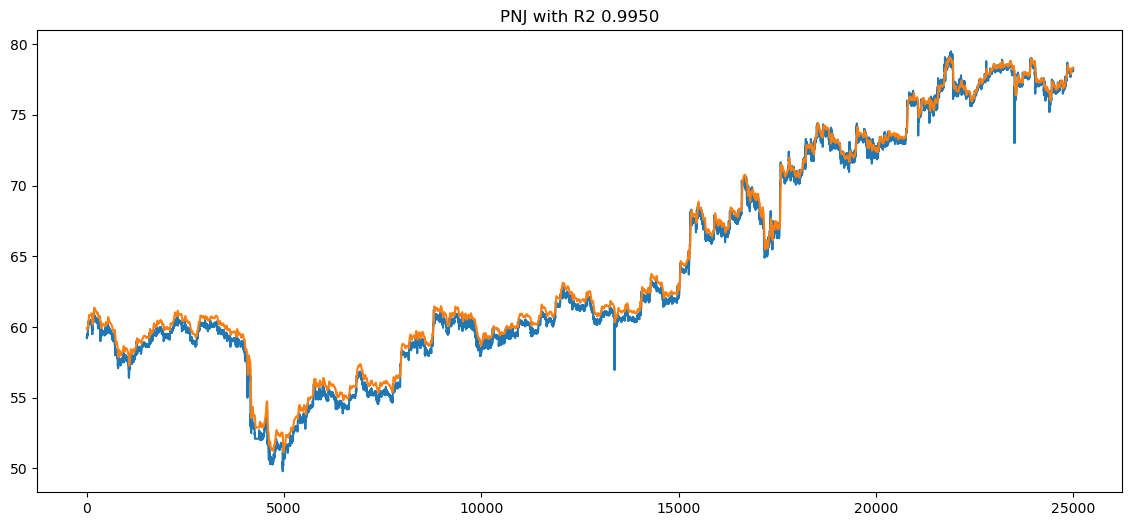

Fitting to VIC
Epoch 1/3


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


269/269 ━━━━━━━━━━━━━━━━━━━━ 68s 230ms/step - loss: 0.0510
Epoch 2/3
269/269 ━━━━━━━━━━━━━━━━━━━━ 65s 241ms/step - loss: 0.0132
Epoch 3/3
269/269 ━━━━━━━━━━━━━━━━━━━━ 69s 256ms/step - loss: 0.0089


632/632 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step


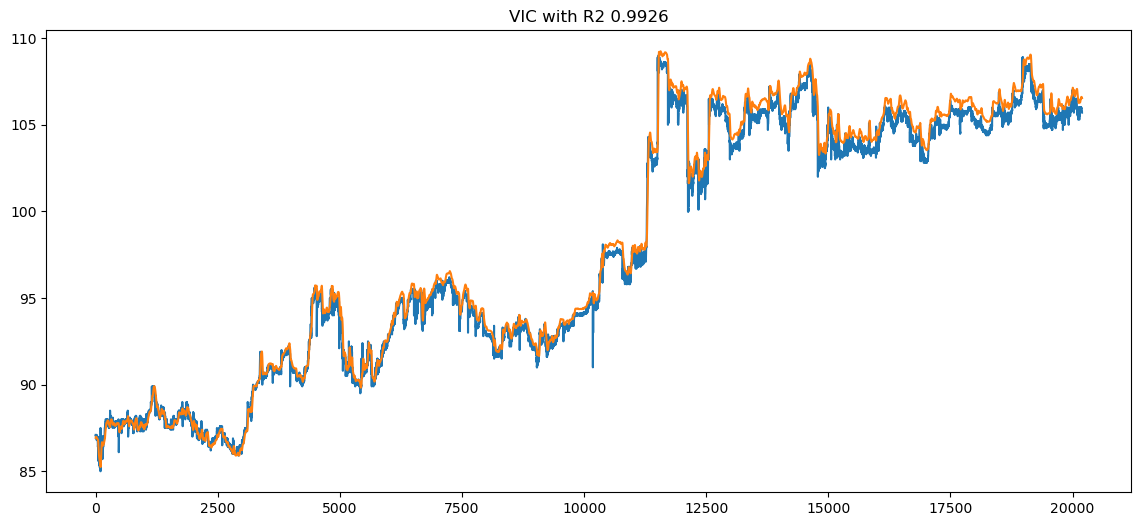

In [6]:
trainset = {}
testset = {}
lookback = 60

for j in stockList:
    train_len = len(data_scaled[j]["Train"])
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(lookback, train_len):
        X_train.append(data_scaled[j]["Train"][i-lookback:i, 0])
        y_train.append(data_scaled[j]["Train"][i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    trainset[j]["y"] = y_train

    test_len = len(data_scaled[j]["Test"])
    testset[j] = {}
    X_test = []
    y_test = []
    for i in range(lookback, test_len):
        X_test.append(data_scaled[j]["Test"][i-lookback:i, 0])
        y_test.append(data_scaled[j]["Test"][i, 0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test

    # Tạo mô hình LSTM
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(units=50))
    model.add(Dropout(0.5))
    model.add(Dense(units=1))

    # Compile mô hình
    model.compile(optimizer='rmsprop', loss='mean_squared_error')
    
    # Huấn luyện mô hình
    print(f"Fitting to {j}")
    model.fit(trainset[j]["X"], trainset[j]["y"], epochs=3, batch_size=301)

    # Lưu mô hình
    model.save(os.path.join(model_dir, f"{j}_model.h5"))

    # Đánh giá mô hình
    y_true = scaler[j].inverse_transform(testset[j]["y"].reshape(-1,1))
    y_pred = scaler[j].inverse_transform(model.predict(testset[j]["X"]))
    R2 = r2_score(y_true, y_pred)

    plt.figure(figsize=(14,6))
    plt.title(f"{j} with R2 {R2:.4f}")
    plt.plot(y_true)
    plt.plot(y_pred)
    plt.show()

# 6. Dự đoán biến động cổ phiếu:

In [7]:
def predict_price_change(ticker, N, time_unit='day', lookback=60):
    # Tải lại mô hình đã huấn luyện cho cổ phiếu
    model = load_model(os.path.join(model_dir, f"{ticker}_model.h5"))

    # Lấy dữ liệu kiểm thử tương ứng cho ticker đã huấn luyện
    test_data = data_scaled[ticker]["Test"]
    
    # Xác định số bước dự đoán dựa trên đơn vị thời gian
    if time_unit == 'minute':
        step_size = 1  # Giả sử dữ liệu được thu thập mỗi phút
    elif time_unit == 'hour':
        step_size = 60  # Giả sử 60 phút một giờ
    elif time_unit == 'day':
        step_size = 1440  # 24 giờ, mỗi giờ 60 phút
    elif time_unit == 'week':
        step_size = 1440 * 7  # 1 tuần có 7 ngày
    elif time_unit == 'month':
        step_size = 1440 * 30  # Giả sử 1 tháng ≈ 30 ngày
    else:
        raise ValueError(f"Không hỗ trợ đơn vị thời gian: {time_unit}")

    # Lấy những dữ liệu cuối cùng trong tập kiểm thử để dự đoán N đơn vị thời gian tiếp theo
    input_data = test_data[-lookback:].reshape(1, lookback, 1)

    # Dự đoán N bước tiếp theo
    predictions = []
    for _ in range(step_size):
        pred = model.predict(input_data)
        predictions.append(pred[0][0])
    
        # Reshape pred để có cùng số chiều với input_data
        pred_reshaped = np.reshape(pred, (1, 1, 1))
    
        # Cập nhật input_data với dự đoán mới để dự đoán bước tiếp theo
        input_data = np.append(input_data[:, 1:, :], pred_reshaped, axis=1)

    # Biến đổi giá trị dự đoán ngược về giá trị thực
    predictions = np.array(predictions).reshape(-1, 1)
    predictions_inverse = scaler[ticker].inverse_transform(predictions)

    return predictions_inverse

In [10]:
### Ví dụ người dùng nhập ticker = "FPT", N = 5 và đơn vị thời gian (ví dụ: phút, ngày, tháng)
ticker = "MSN"
N = 2  # Số đơn vị muốn dự đoán
time_unit = 'day'  # Chọn đơn vị thời gian: minute, hour, day, week, month

predicted_price_change = predict_price_change(ticker, N, time_unit)
print(f"Dự đoán biến động giá cho {ticker} trong {N} {time_unit}(s) tiếp theo:")
print(predicted_price_change)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━

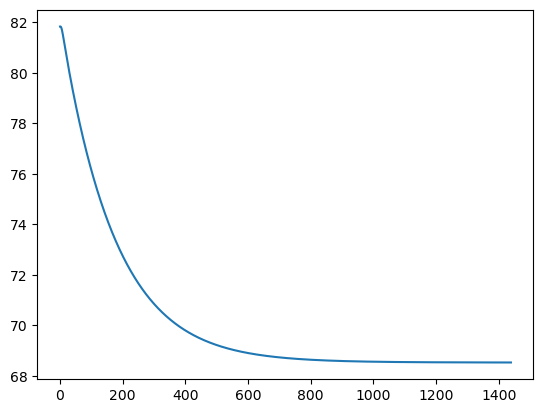

In [11]:
plt.plot(predicted_price_change)
plt.show()